In [ ]:
#fasttext

In [1]:
pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4393194 sha256=66ee97439e31e807ef87ab117fb64039c288cd34ab284cdd6c703ab6734d0313
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
#veri setini hazırlama

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Excel dosyasını yükleme
excel_file = '/content/prepliIrkcilik.xlsx'
sheet_name = 'Sheet1'  # Verilerin bulunduğu sayfa adı

# Excel dosyasını DataFrame olarak okuma
df = pd.read_excel(excel_file, sheet_name=sheet_name)

# Sütunları seçme
sentences = df['A'].tolist()
labels = df['B'].tolist()

# Train ve test veri setlerini oluşturma
train_sentences, test_sentences, train_labels, test_labels = train_test_split(sentences, labels, test_size=0.2, random_state=42)

# Train veri setini oluşturulan dosyaya yazma
with open('train.txt', 'w', encoding='utf-8') as train_file:
    for sentence, label in zip(train_sentences, train_labels):
        train_file.write('__label__{} {}\n'.format(label, sentence))

# Test veri setini oluşturulan dosyaya yazma
with open('test.txt', 'w', encoding='utf-8') as test_file:
    for sentence, label in zip(test_sentences, test_labels):
        test_file.write('__label__{} {}\n'.format(label, sentence))

In [5]:
train_data_path = '/content/train.txt'

# Txt dosyasını okuma
with open(train_data_path, 'r', encoding='utf-8') as file:
    data = file.readlines()

# Başlangıçtaki 5 satırı görüntüleme
for line in data[:5]:
    print(line)

__label__1 allahın mescit tevbe sûresinden

__label__1 ingilterede karşıt gösteri ardından bıçakla 3 kişi hayat kaybet aracılık

__label__0 ben yaşam alan kısıtlayandevletten al gerek hizmet öncelik öteleyenkendi vatan ben parya durum düş bir muhacirensar akraba ilişki böyle bir yönetim anlayış kabul et et ad

__label__0 fransada islamofobiye tepki büyü fransada devlet islamofobisi ırk var

__label__0 fransa milli takım ırk skandal futbol tepki yağ



In [11]:
train_data_path = '/content/test.txt'

# Txt dosyasını okuma
with open(train_data_path, 'r', encoding='utf-8') as file:
    data = file.readlines()

# Başlangıçtaki 5 satırı görüntüleme
for line in data[:5]:
    print(line)

__label__0 toplum huzur boz icinde birbiri saygi duyark yasamalarina ket vurmaulkede cikarma kucucuk cocuklr fark millet olduklari icin zihniyet yuzundn evlerindn cikmaya 0korkar olmu

__label__0 mülakat seç memur ol toplum örnek ol örnek ol yetiş kadar aday ara seç eşşek değer ver kendi yarış at zannet torpil memur seç hal hareket kaçınılmaz

__label__0 sen allahın gurban allahın mutlu türk

__label__0 irkçiliğin gölge dünya yak hazirlanirken

__label__0 çocuk ırk din bil insan ayrım yap ölçüt sevgi nefret büyük öğren inşallah sözde öğretmen müsvetteleri kendi iç kürt nefret çocuk aşıla



In [10]:
import fasttext

# Eğitim veri setini yükleme
train_data_path = '/content/train.txt'

# Modeli eğitme
model = fasttext.train_supervised(input=train_data_path)

# Test veri setini yükleme
test_data_path = '/content/test.txt'

# Modeli değerlendirme
result = model.test(test_data_path)

# Sonuçları görüntüleme
print('Doğruluk oranı: {:.2f}%'.format(result[1] * 100))

Doğruluk oranı: 64.94%


In [ ]:
#word2vec

In [12]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


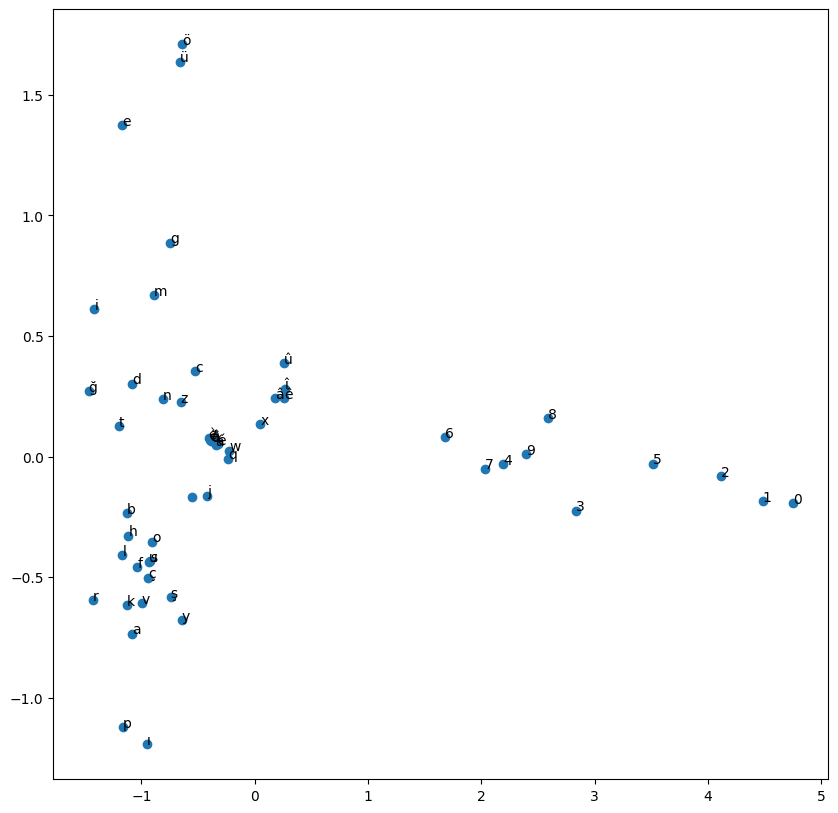

In [14]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Excel dosyasını okuma
data = pd.read_excel('/content/prepliIrkcilik.xlsx')

# Cümleleri ve etiketleri ayrı listelere ayırma
sentences = data['A'].tolist()
labels = data['B'].tolist()

# Word2Vec modelini eğitme
model = Word2Vec(sentences, min_count=1)

# Kelime vektörlerini elde etme
vectors = model.wv

# Örnek kelimenin vektörünü almak
#word = "örnek"
#word_vector = vectors[word]

# Vektör boyutunu kontrol etme
vector_size = model.vector_size

# Tüm kelime vektörlerini PCA ile indirgeme
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors.vectors)

# Görselleştirme
words = list(vectors.key_to_index.keys())
x = vectors_2d[:, 0]
y = vectors_2d[:, 1]

plt.figure(figsize=(10, 10))
plt.scatter(x, y)

for i, word in enumerate(words):
    plt.annotate(word, (x[i], y[i]))

plt.show()